# Multiple stationary bodies
Adding multiple bodies to a problem is easy, using the concepts of a `BodyList`
and `RigidTransformList`.

In [1]:
using ViscousFlow

In [2]:
using Plots

In this example, we will set up a problem with three cylinders arranged in a
formation in a free stream.

In [3]:
my_params = Dict()
my_params["Re"] = 200
my_params["freestream speed"] = 1.0
my_params["freestream angle"] = 0.0

0.0

Set up the domain and surface point spacing

In [4]:
xlim = (-2.0,4.0)
ylim = (-2.0,2.0)
my_params["grid Re"] = 4.0
g = setup_grid(xlim,ylim,my_params)
Δs = surface_point_spacing(g,my_params)

0.027999999999999997

### Set up bodies
We start by initializing a `BodyList` and an associated `RigidTransformList`.
Each member of the `RigidTransformList` will be used to place the respective body in
the correct position and orientation.

In [5]:
bl = BodyList()
tl = RigidTransformList()

RigidTransformList(RigidTransform[])

Place the first body at (-1,0)

In [6]:
push!(bl,Circle(0.5,Δs))
push!(tl,RigidTransform((-1,0),0));

Place the second body at (1,-1)

In [7]:
push!(bl,Circle(0.5,Δs))
push!(tl,RigidTransform((1,-1),0));

and place the third body at (1,1)

In [8]:
push!(bl,Circle(0.5,Δs))
push!(tl,RigidTransform((1,1),0))

3-element Vector{RigidTransform}:
 Rigid-body transform
  Translation: (-1.0,0.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,1.0)
  Rotation angle (rad): 0.0


Perform the actual transformation. Note that this operation works `in-place`:

In [9]:
tl(bl)

3-element Vector{Ellipse{112}}:
 Circular body with 112 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0

 Circular body with 112 points and radius 0.5
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0

 Circular body with 112 points and radius 0.5
   Current position: (1.0,1.0)
   Current angle (rad): 0.0


#### Plot the initial configuration of the bodies
Just to check they are in the right places

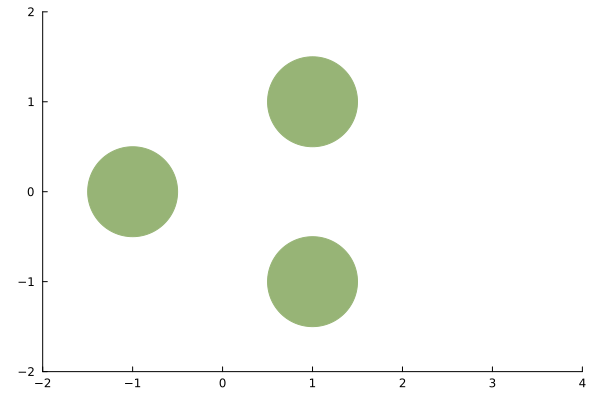

In [10]:
plot(bl,xlim=xlim,ylim=ylim)

### Construct the system structure
We construct the system with the same syntax as for a single body:

In [11]:
sys = viscousflow_system(g,bl,phys_params=my_params);

In [12]:
u0 = init_sol(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 304, ny = 210) cell grid of type Float64 data
  Number of Dual nodes: (nx = 304, ny = 210), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

### Solve
Here, we run it for a little while, just to demonstrate:

In [13]:
@time step!(integrator,2.0)

 21.798318 seconds (4.81 M allocations: 2.768 GiB, 0.54% gc time, 9.24% compilation time)


### Examine
Let's inspect the results

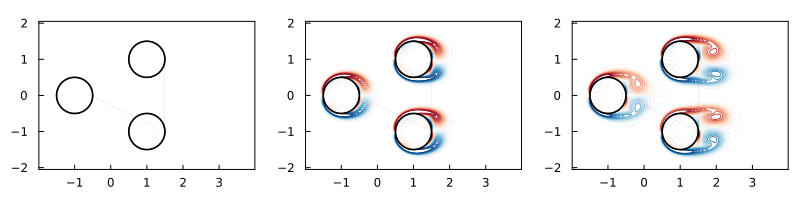

In [14]:
sol = integrator.sol
plt = plot(layout = (1,3), size = (800, 200), legend=:false)
tsnap = 0.0:1.0:2.0
for (i, t) in enumerate(tsnap)
    plot!(plt[i],vorticity(sol,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end
plt

Now we will examine the force on each body

In [15]:
fx1, fy1 = force(sol,sys,1)
fx2, fy2 = force(sol,sys,2)
fx3, fy3 = force(sol,sys,3);

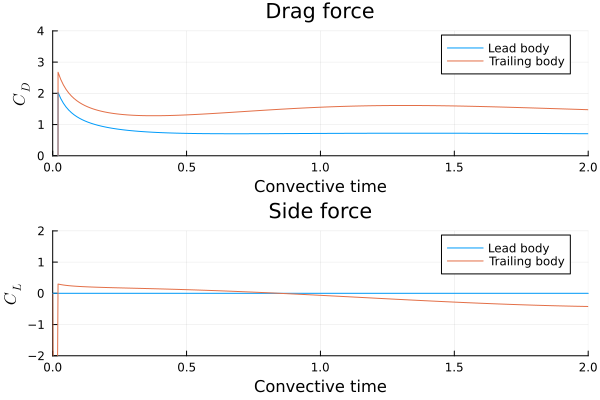

In [16]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[1],sol.t,2*fx1,xlim=(0,Inf),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Lead body",title="Drag force")
plot!(plt[2],sol.t,2*fy1,xlim=(0,Inf),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Lead body",title="Side force")
plot!(plt[1],sol.t,2*fx2,xlim=(0,Inf),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Trailing body",title="Drag force")
plot!(plt[2],sol.t,2*fy2,xlim=(0,Inf),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Trailing body",title="Side force")

In [17]:
println("Mean drag coefficient on lead body = ", GridUtilities.mean(2*fx1[3:end]))

Mean drag coefficient on lead body = 0.7770300207555111


In [18]:
println("Mean drag coefficient on trailing body = ", GridUtilities.mean(2*fx2[3:end]))

Mean drag coefficient on trailing body = 1.5159031724331768


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*